In [1]:
import os
import sklearn
import tempfile

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# Kaggle Credit Card Fraud data set

file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Examine the class label imbalance

neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [6]:
# Clean, split and normalize the data

cleaned_df = raw_df.copy()

cleaned_df.pop('Time')

eps = 0.001 
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount') + eps)

In [7]:
train_df, test_df = train_test_split(cleaned_df, test_size = 0.2)
train_df, val_df = train_test_split(train_df, test_size = 0.2)

train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [8]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


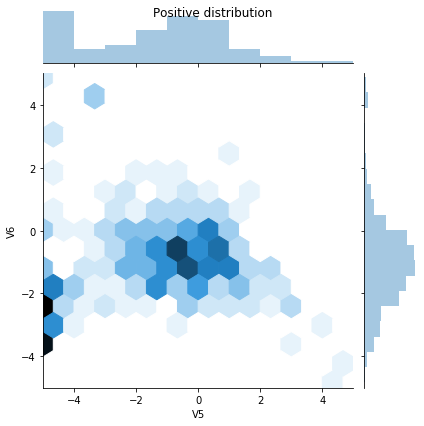

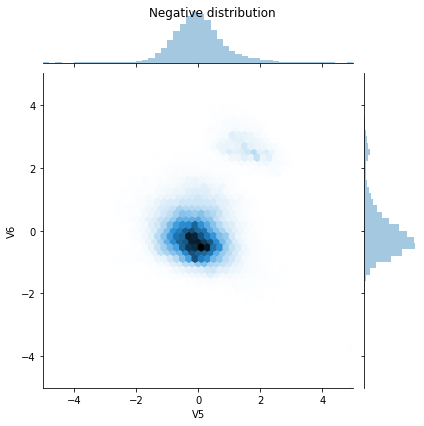

In [9]:
# Look at the data distribution

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns = train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns = train_df.columns)

sns.jointplot(pos_df['V5'], pos_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['V5'], neg_df['V6'],
              kind='hex', xlim = (-5,5), ylim = (-5,5))
_ = plt.suptitle("Negative distribution")

In [10]:
# Define Model and Metrics

METRICS = [
      keras.metrics.TruePositives(name = 'tp'),
      keras.metrics.FalsePositives(name = 'fp'),
      keras.metrics.TrueNegatives(name = 'tn'),
      keras.metrics.FalseNegatives(name = 'fn'), 
      keras.metrics.BinaryAccuracy(name = 'accuracy'),
      keras.metrics.Precision(name = 'precision'),
      keras.metrics.Recall(name = 'recall'),
      keras.metrics.AUC(name = 'auc'),
]

def make_model(metrics = METRICS, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation = 'relu',
          input_shape = (train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation = 'sigmoid',
                         bias_initializer = output_bias),
  ])

  model.compile(
      optimizer = keras.optimizers.Adam(lr = 1e-3),
      loss = keras.losses.BinaryCrossentropy(),
      metrics = metrics)

  return model

In [11]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_auc', 
    verbose = 1,
    patience = 10,
    mode = 'max',
    restore_best_weights = True)

In [12]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [13]:
# See initial bias

results = model.evaluate(train_features, train_labels, batch_size = BATCH_SIZE, verbose = 0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.0298


In [14]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [15]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.00069092],
       [0.00271642],
       [0.00053418],
       [0.00381093],
       [0.00286679],
       [0.00095032],
       [0.00141693],
       [0.00147439],
       [0.00109427],
       [0.00207754]], dtype=float32)

In [16]:
results = model.evaluate(train_features, train_labels, batch_size = BATCH_SIZE, verbose = 0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0120


In [17]:
# Checkpoint weights

initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [18]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = 20,
    validation_data = (val_features, val_labels), 
    verbose = 0)

In [19]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = 20,
    validation_data = (val_features, val_labels), 
    verbose = 0)

In [20]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color = colors[n], label = 'Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color = colors[n], label = 'Val '+label,
          linestyle = "--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

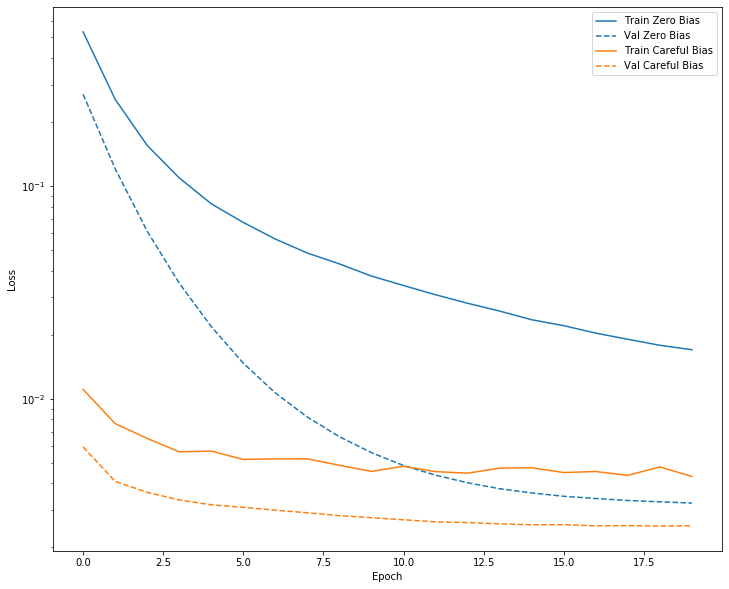

In [21]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [22]:
# Train

model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_features, val_labels))

Train on 182276 samples, validate on 45569 samples
Epoch 1/100
182276/182276 [==============================] - 3s 15us/sample - loss: 0.0106 - tp: 45.0000 - fp: 55.0000 - tn: 181889.0000 - fn: 287.0000 - accuracy: 0.9981 - precision: 0.4500 - recall: 0.1355 - auc: 0.7798 - val_loss: 0.0058 - val_tp: 8.0000 - val_fp: 0.0000e+00 - val_tn: 45497.0000 - val_fn: 64.0000 - val_accuracy: 0.9986 - val_precision: 1.0000 - val_recall: 0.1111 - val_auc: 0.9299
Epoch 2/100
182276/182276 [==============================] - 1s 4us/sample - loss: 0.0077 - tp: 105.0000 - fp: 25.0000 - tn: 181919.0000 - fn: 227.0000 - accuracy: 0.9986 - precision: 0.8077 - recall: 0.3163 - auc: 0.8538 - val_loss: 0.0042 - val_tp: 28.0000 - val_fp: 5.0000 - val_tn: 45492.0000 - val_fn: 44.0000 - val_accuracy: 0.9989 - val_precision: 0.8485 - val_recall: 0.3889 - val_auc: 0.9233
Epoch 3/100
182276/182276 [==============================] - 1s 4us/sample - loss: 0.0066 - tp: 139.0000 - fp: 20.0000 - tn: 181924.0000 - fn: 1

182276/182276 [==============================] - 1s 4us/sample - loss: 0.0044 - tp: 199.0000 - fp: 28.0000 - tn: 181916.0000 - fn: 133.0000 - accuracy: 0.9991 - precision: 0.8767 - recall: 0.5994 - auc: 0.9207 - val_loss: 0.0025 - val_tp: 57.0000 - val_fp: 8.0000 - val_tn: 45489.0000 - val_fn: 15.0000 - val_accuracy: 0.9995 - val_precision: 0.8769 - val_recall: 0.7917 - val_auc: 0.9373
Epoch 22/100
182276/182276 [==============================] - 1s 4us/sample - loss: 0.0046 - tp: 181.0000 - fp: 26.0000 - tn: 181918.0000 - fn: 151.0000 - accuracy: 0.9990 - precision: 0.8744 - recall: 0.5452 - auc: 0.9147 - val_loss: 0.0025 - val_tp: 57.0000 - val_fp: 7.0000 - val_tn: 45490.0000 - val_fn: 15.0000 - val_accuracy: 0.9995 - val_precision: 0.8906 - val_recall: 0.7917 - val_auc: 0.9373
Epoch 23/100
182276/182276 [==============================] - 1s 4us/sample - loss: 0.0044 - tp: 190.0000 - fp: 33.0000 - tn: 181911.0000 - fn: 142.0000 - accuracy: 0.9990 - precision: 0.8520 - recall: 0.5723 